In [44]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, transforms
import torchvision.transforms as T
import matplotlib.pyplot as plt
from scipy.io.matlab import loadmat, savemat
from sklearn.model_selection import train_test_split

from Model import *

# Load dataset

c:\Users\zhuang\AppData\Local\anaconda3\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


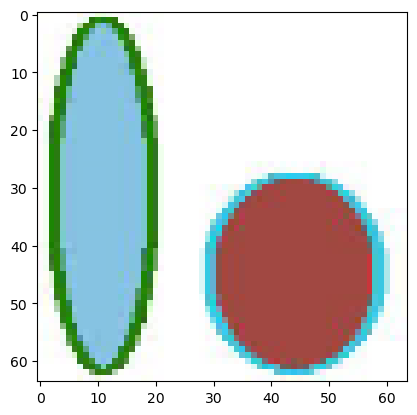

In [45]:
paired_dir = '/Users/zhuang/Documents/data_one_state/'

image_transform = transforms.Compose([
    transforms.ToTensor(),
    crop(),
    transforms.Resize((64, 64)),
])

dataset = datasets.ImageFolder(root=paired_dir, transform=image_transform)
classes = dataset.find_classes(paired_dir)[0]
image = dataset[10][0]
t = T.ToPILImage()
plt.imshow(t(image))


# Model

In [46]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [47]:
# Create the data loaders for training and validation
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)

train_dataloader = torch.utils.data.DataLoader(
    train_data,
    batch_size=200,
    shuffle=True
)

test_dataloader = torch.utils.data.DataLoader(
    test_data,
    batch_size=200,
    shuffle=False
)

# Learning phase

In [49]:
epochs = 20
model = LeNet2().to(device)
model.fc1 = nn.Linear(1024,1024)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)

# save model
torch.save(model.state_dict(), f"./models/model_one_state")
print("Done!")

Epoch 1
-------------------------------
loss: 1.387661  [  200/ 3200]
Test Error: 
 Accuracy: 46.6%, Avg loss: 1.125109 

Epoch 2
-------------------------------
loss: 1.149147  [  200/ 3200]
Test Error: 
 Accuracy: 47.5%, Avg loss: 1.048489 

Epoch 3
-------------------------------
loss: 1.089023  [  200/ 3200]
Test Error: 
 Accuracy: 54.8%, Avg loss: 0.931320 

Epoch 4
-------------------------------
loss: 0.924517  [  200/ 3200]
Test Error: 
 Accuracy: 58.5%, Avg loss: 0.868515 

Epoch 5
-------------------------------
loss: 0.832718  [  200/ 3200]
Test Error: 
 Accuracy: 59.1%, Avg loss: 0.815251 

Epoch 6
-------------------------------
loss: 0.881155  [  200/ 3200]
Test Error: 
 Accuracy: 60.6%, Avg loss: 0.809501 

Epoch 7
-------------------------------
loss: 0.654009  [  200/ 3200]
Test Error: 
 Accuracy: 62.3%, Avg loss: 0.793745 

Epoch 8
-------------------------------
loss: 0.766448  [  200/ 3200]
Test Error: 
 Accuracy: 64.6%, Avg loss: 0.764954 

Epoch 9
----------------

In [50]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)

# save model
torch.save(model.state_dict(), f"./models/model_one_state")
print("Done!")

Epoch 1
-------------------------------
loss: 0.450978  [  200/ 3200]
Test Error: 
 Accuracy: 74.2%, Avg loss: 0.649785 

Epoch 2
-------------------------------
loss: 0.366869  [  200/ 3200]
Test Error: 
 Accuracy: 74.2%, Avg loss: 0.654962 

Epoch 3
-------------------------------
loss: 0.441538  [  200/ 3200]
Test Error: 
 Accuracy: 74.6%, Avg loss: 0.651290 

Epoch 4
-------------------------------
loss: 0.387624  [  200/ 3200]
Test Error: 
 Accuracy: 74.8%, Avg loss: 0.630926 

Epoch 5
-------------------------------
loss: 0.284250  [  200/ 3200]
Test Error: 
 Accuracy: 77.0%, Avg loss: 0.573364 

Epoch 6
-------------------------------
loss: 0.360574  [  200/ 3200]
Test Error: 
 Accuracy: 76.4%, Avg loss: 0.593014 

Epoch 7
-------------------------------
loss: 0.366414  [  200/ 3200]
Test Error: 
 Accuracy: 75.4%, Avg loss: 0.659819 

Epoch 8
-------------------------------
loss: 0.487727  [  200/ 3200]
Test Error: 
 Accuracy: 75.9%, Avg loss: 0.623129 

Epoch 9
----------------

# Confusion Matrix (with all prediction)

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score
import matplotlib.pyplot as plt

# Display Train: Matrix Confusion
y_true_train = []
y_pred_train = []
for X, y in train_dataloader:
    y_true_train.extend(y.data.cpu().numpy())
    X, y = X.to(device), y.to(device)
    pred = model(X)
    y_pred_train.extend(pred.argmax(1).data.cpu().numpy())

# Display Train: Matrix Confusion
y_true_test = []
y_pred_test = []
for X, y in test_dataloader:
    y_true_test.extend(y.data.cpu().numpy())
    X, y = X.to(device), y.to(device)
    pred = model(X)
    y_pred_test.extend(pred.argmax(1).data.cpu().numpy())

y_true_train = np.array(y_true_train)
y_pred_train = np.array(y_pred_train)
y_true_test = np.array(y_true_test)
y_pred_test = np.array(y_pred_test)

Train performance: 0.948
========= Precision ==============
alignBottom : 0.966
alignLeft : 0.960
alignRight : 0.928
alignTop : 0.940


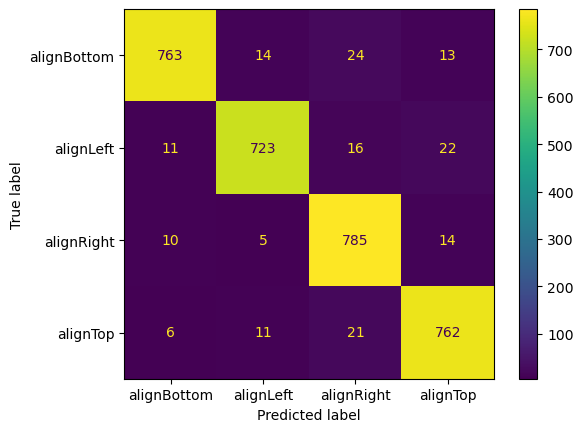

In [52]:
# Matrix train
print("Train performance: %.3f" % np.where(y_true_train == y_pred_train, 1, 0).mean())
print("========= Precision ==============")
for a,b in zip(classes,precision_score(y_true_train, y_pred_train, average=None)):
    print(f'{a} : {b:.3f}')
conf_matrix = confusion_matrix(y_true_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = classes)
disp.plot()
plt.savefig('../Rapports/images/Train/Train_one_state.png')
plt.show()

Test performance: 0.775
========= Precision ==============
alignBottom : 0.815
alignLeft : 0.811
alignRight : 0.734
alignTop : 0.743


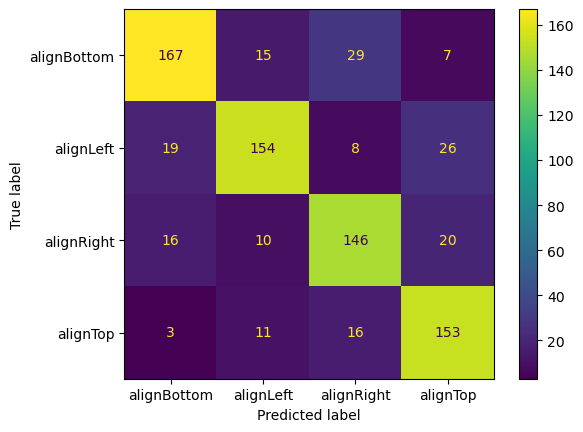

In [53]:
# Matrix test
print("Test performance: %.3f" % np.where(y_true_test == y_pred_test, 1, 0).mean())
print("========= Precision ==============")
for a,b in zip(classes,precision_score(y_true_test, y_pred_test, average=None)):
    print(f'{a} : {b:.3f}')
conf_matrix = confusion_matrix(y_true_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = classes)
disp.plot()
plt.savefig('../Rapports/images/Test/Test_one_state.png')
plt.show()

# Matrix Confusion (with only good predictions)

Accuracy avant: 0.775
Accuracy après: 0.872
pred restantes:  525
pred supprimees:  275
pourcentage restant: 0.656


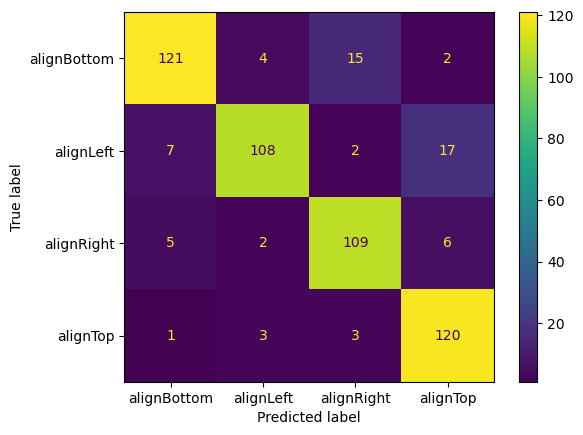

In [55]:
import numpy as np
#Used to calculate the confusion matrix
y_true = []
y_pred = []

for X, y in test_dataloader:
    y_true.extend(y.data.cpu().numpy())
    X, y = X.to(device), y.to(device)
    pred = model(X)
    pred = pred.softmax(dim=1)
    y_pred.extend(pred.data.cpu().numpy())
    
y_pred = np.array(y_pred)
y_true = np.array(y_true)
seuil = 0.90
indices = y_pred.max(1) > seuil

print("Accuracy avant: %.3f" % np.where(y_pred.argmax(1) == y_true, 1, 0).mean())
y_pred = y_pred[indices].argmax(1)
y_true = y_true[indices]
print("Accuracy après: %.3f" % np.where(y_pred == y_true, 1, 0).mean())

conf_matrix = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = classes)
disp.plot()

print("pred restantes: ", sum(indices))
print("pred supprimees: ", sum(False == indices))
print("pourcentage restant: %.3f" % (sum(indices)/len(indices)))


plt.show()

